# Visualization #4: Blood Pressure Distribution with Violin Plot

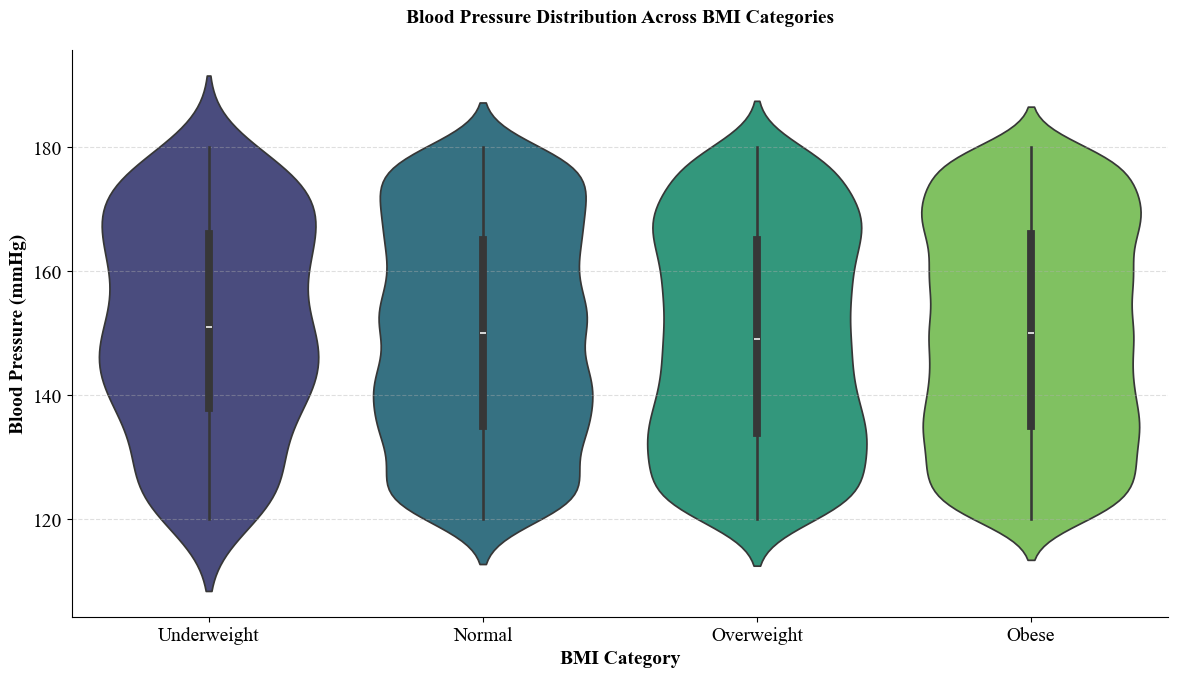

In [19]:
# Import libraries
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Set global font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
rcParams['axes.titlepad'] = 20  

# Load data
df = pd.read_csv('heart_disease.csv')

# Create BMI categories using standard thresholds
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI Category'] = df['BMI'].apply(categorize_bmi)

# Filter out rows with missing blood pressure data
df = df.dropna(subset=['Blood Pressure'])

# Create violin plot
plt.figure(figsize=(12, 7))
violin = sns.violinplot(
    x='BMI Category',
    y='Blood Pressure',
    data=df,
    palette='viridis',
    order=['Underweight', 'Normal', 'Overweight', 'Obese']
)

# Set uniform font styling for all elements
title = plt.title('Blood Pressure Distribution Across BMI Categories', 
                 fontsize=14, fontweight='bold')
plt.xlabel('BMI Category', fontsize=14, fontweight='bold')
plt.ylabel('Blood Pressure (mmHg)', fontsize=14, fontweight='bold')

# Adjust tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Customize grid and spines
plt.grid(axis='y', linestyle='--', alpha=0.4)
sns.despine()

# Ensure all text elements use Times New Roman
for item in ([title, violin.xaxis.label, violin.yaxis.label] + 
             violin.get_xticklabels() + violin.get_yticklabels()):
    item.set_fontfamily('Times New Roman')
    item.set_fontsize(14)

# Display visualization
plt.tight_layout()
#plt.savefig('Jamie_BloodPressureDistribution_ViolinPlot.png')
plt.show()

## Detailed Explanation
This violin plot reveals the distribution of systolic blood pressure readings across four BMI categories (Underweight, Normal, Overweight, and Obese). Each violin shape combines a box plot that displays the median and IQR (measurement of data spread) with a kernel density estimate. With a violin plot the wider sections indicate a higher density of patients with specific blood pressure values. For example, in the obese category we can see the widest section around 135 and 170mmHg which suggests that hypertension clusters in these groups. With the violin plot the median is signified by the white dot inside the black bar (IQR). With the data, it would be expected that as the categories move from left to right, the medians would rise progressively however, this is not what occurs. From the visualization we can see that all the categories have the same median value which is unexpected and might imply that the data is artifical in some way or that there is a secondary cause of hypertension. With the violin plot the interquartile ranges (IQR) is signified by the black bar and a longer bar indicates a greater variability in blood pressure within that BMI group. With the data, it would be expected that as the categories move from left to right, the IQR would stretch and grow. From the visualization we can see that the underweight category has the smallest IQR and that the overwieght category barely has the largest IQR over the obese category. 

### Why This Matters
This data can assist in both public health and in clinical practice as it visually demonstrates how physical weight impacts cardivascular health. The progressive widening and rightward shift of blood pessure demonstrates how excess weight puts a dangerous strain on the circulatory system which can result in frequent or lethal heart attacks. The plot underscores why obesity prevention isn't just about aesthetics but is a way of defense against life-threatening conditions. 

# Visualization #5: 3D Scatterplot of Cardiovascular Risk Factors

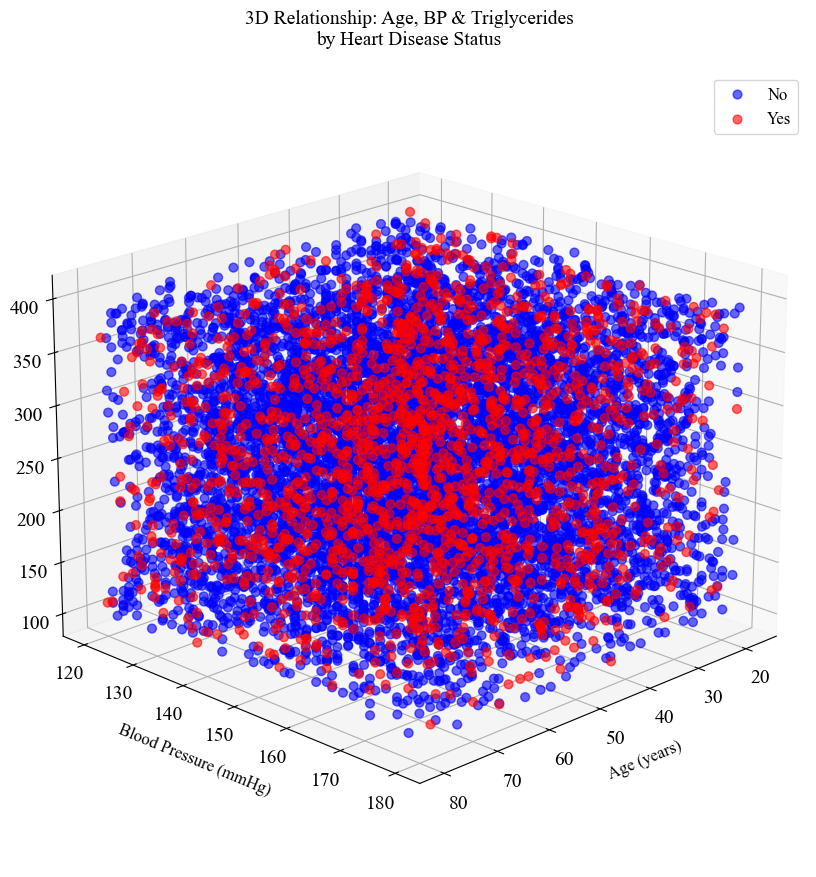

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load data
df = pd.read_csv('heart_disease.csv').dropna(subset=['Age', 'Blood Pressure', 'Triglyceride Level'])

# Create figure
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Plot by heart disease status
for status, color in [('No', 'blue'), ('Yes', 'red')]:
    subset = df[df['Heart Disease Status'] == status]
    ax.scatter(
        subset['Age'],
        subset['Blood Pressure'],
        subset['Triglyceride Level'],
        c=color,
        label=status,
        alpha=0.6,
        s=40
    )

# Formatting
ax.set_xlabel('Age (years)', fontsize=12, labelpad=10)
ax.set_ylabel('Blood Pressure (mmHg)', fontsize=12, labelpad=10)
ax.set_zlabel('Triglycerides (mg/dL)', fontsize=12, labelpad=10)
ax.set_title('3D Relationship: Age, BP & Triglycerides\nby Heart Disease Status', 
             fontsize=14, pad=20)
ax.legend(fontsize=12)
ax.grid(True)

# Set height for best view
ax.view_init(elev=20, azim=45)

# Display the visualization
plt.tight_layout()
#plt.savefig('Jamie_HealthDiseaseStatus_3DScatterplot.png')
plt.show()

## Detailed Explanation

### Why This Matters


# Visualization #6: Pie Chart Showing Gender Differences in Heart Disease History

<Figure size 1000x600 with 0 Axes>

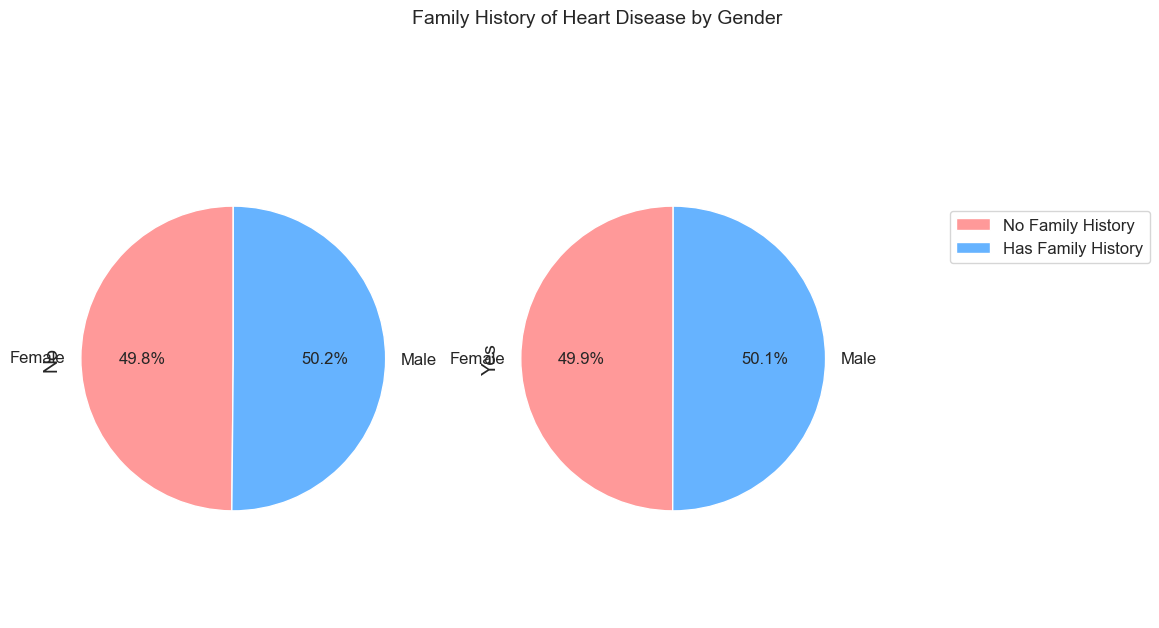

In [27]:
# Prepare data
family_history = df.groupby(['Gender', 'Family Heart Disease']).size().unstack()

# Plot
plt.figure(figsize=(10, 6))
family_history.plot(
    kind='pie',
    subplots=True,
    autopct='%1.1f%%',
    colors=['#ff9999','#66b3ff'],
    textprops={'fontsize': 12},
    legend=False,
    startangle=90
)

# Formatting
plt.suptitle('Family History of Heart Disease by Gender', 
             fontsize=14, y=1.05)
plt.axis('equal')

# Custom legend
plt.legend(
    ['No Family History', 'Has Family History'],
    bbox_to_anchor=(1.3, 0.8),
    fontsize=12
)

# Display visualization
plt.tight_layout()
#plt.savefig('Jamie_FamilyHistoryByGender_PieChart.png')
plt.show()

## Detailed Explanation

### Why This Matters
